In [10]:
# Tampilkan isi data
print("📋 Data: Hasil_Kuesioner_WhatsApp (0–1)")
print(df1.to_string(index=False))

print("\n📋 Data: kuesioner_wa (1–5)")
print(df2.to_string(index=False))

# Statistik
print("\n📊 Statistik Deskriptif: Hasil_Kuesioner_WhatsApp")
hitung_statistik(df1, kolom1)

print("\n📊 Statistik Deskriptif: kuesioner_wa")
hitung_statistik(df2, kolom2)

📋 Data: Hasil_Kuesioner_WhatsApp (0–1)
                        Nama  X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
             Muhammad Akbar    1   1   1   1   1   1   1   1   1    1
                Dea Natasia    1   1   1   1   1   1   0   1   1    0
         Tiara Jasmine Putri   1   1   1   1   1   1   1   1   1    0
              Dea Anggraini    1   1   1   1   1   1   1   1   1    1
Anindya Dwidesvear Maharani    0   1   1   1   0   1   1   1   0    1
   Ashiela Yulbyan Prasetya    1   1   1   1   1   1   1   1   1    1
                        ival   1   1   1   1   1   1   1   1   1    1
                 Puji Inayah   1   1   1   1   1   1   1   1   1    1
    Qaanitah aditria imtiyaz   1   1   1   1   0   1   0   1   0    0
                rama danisa    1   1   1   1   1   1   1   1   1    0
                    m.rahsel   1   1   1   1   0   1   0   1   1    0
              Muhammad Yusuf   1   1   1   0   1   1   1   1   1    0
            M rizki al akbar   1   1   1   1   1   

In [11]:
def uji_validitas(df, kolom_list, nama_file):
    df["Total"] = df[kolom_list].sum(axis=1)
    print(f"\n📈 Uji Validitas (Pearson): {nama_file}")
    for kol in kolom_list:
        r, p = pearsonr(df[kol], df["Total"])
        status = "Valid" if r >= 0.3 else "Tidak Valid"
        print(f"{kol}: r = {round(r, 3)}, p = {round(p, 4)} → {status}")

uji_validitas(df1, kolom1, "Hasil_Kuesioner_WhatsApp")
uji_validitas(df2, kolom2, "kuesioner_wa")


📈 Uji Validitas (Pearson): Hasil_Kuesioner_WhatsApp
X1: r = 0.424, p = 0.0 → Valid
X2: r = 0.422, p = 0.0 → Valid
X3: r = 0.011, p = 0.9159 → Tidak Valid
X4: r = 0.523, p = 0.0 → Valid
X5: r = 0.43, p = 0.0 → Valid
X6: r = 0.189, p = 0.06 → Tidak Valid
X7: r = 0.728, p = 0.0 → Valid
X8: r = 0.398, p = 0.0 → Valid
X9: r = 0.635, p = 0.0 → Valid
X10: r = 0.652, p = 0.0 → Valid

📈 Uji Validitas (Pearson): kuesioner_wa
X1: r = 0.825, p = 0.0 → Valid
X2: r = 0.848, p = 0.0 → Valid
X3: r = 0.691, p = 0.0 → Valid
X4: r = 0.823, p = 0.0 → Valid
X5: r = 0.876, p = 0.0 → Valid
X6: r = 0.731, p = 0.0 → Valid
X7: r = 0.842, p = 0.0 → Valid
X8: r = 0.833, p = 0.0 → Valid
X9: r = 0.744, p = 0.0 → Valid
X10: r = 0.825, p = 0.0 → Valid


In [3]:
# Import semua pustaka yang diperlukan
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from patsy import dmatrix

# ===============================
# BACA FILE
# ===============================
# Gantilah path sesuai lokasi file kamu
df1 = pd.read_excel("Hasil_Kuesioner_WhatsApp.xlsx")
df2 = pd.read_excel("kuesioner_wa.xlsx")

# Ambil kolom pertanyaan
kolom1 = df1.columns[1:]  # df1: setelah Nama
kolom2 = df2.columns[2:]  # df2: setelah Nomor dan Nama

# Hitung total skor masing-masing responden
df1["Total"] = df1[kolom1].sum(axis=1)
df2["Total"] = df2[kolom2].sum(axis=1)

# ===============================
# FUNGSI UJI LINEARITAS
# ===============================
def uji_linearitas(df, kolom_list, nama_file):
    print(f"\n📐 UJI LINEARITAS ({nama_file})\n" + "-"*50)
    for kol in kolom_list:
        try:
            model = ols(f"Total ~ Q('{kol}')", data=df).fit()
            anova = sm.stats.anova_lm(model, typ=2)
            p_val = anova["PR(>F)"].iloc[0]
            status = "Linear" if p_val < 0.05 else "Tidak Linear"
            print(f"{kol:<5}: p-value = {p_val:.4f} → {status}")
        except Exception as e:
            print(f"{kol:<5}: ERROR → {e}")

# ===============================
# JALANKAN UNTUK KEDUA FILE
# ===============================
uji_linearitas(df1, kolom1, "Hasil_Kuesioner_WhatsApp")
uji_linearitas(df2, kolom2, "kuesioner_wa")


📐 UJI LINEARITAS (Hasil_Kuesioner_WhatsApp)
--------------------------------------------------
X1   : p-value = 0.0000 → Linear
X2   : p-value = 0.0000 → Linear
X3   : p-value = 0.9159 → Tidak Linear
X4   : p-value = 0.0000 → Linear
X5   : p-value = 0.0000 → Linear
X6   : p-value = 0.0600 → Tidak Linear
X7   : p-value = 0.0000 → Linear
X8   : p-value = 0.0000 → Linear
X9   : p-value = 0.0000 → Linear
X10  : p-value = 0.0000 → Linear

📐 UJI LINEARITAS (kuesioner_wa)
--------------------------------------------------
X1   : p-value = 0.0000 → Linear
X2   : p-value = 0.0000 → Linear
X3   : p-value = 0.0000 → Linear
X4   : p-value = 0.0000 → Linear
X5   : p-value = 0.0000 → Linear
X6   : p-value = 0.0000 → Linear
X7   : p-value = 0.0000 → Linear
X8   : p-value = 0.0000 → Linear
X9   : p-value = 0.0000 → Linear
X10  : p-value = 0.0000 → Linear


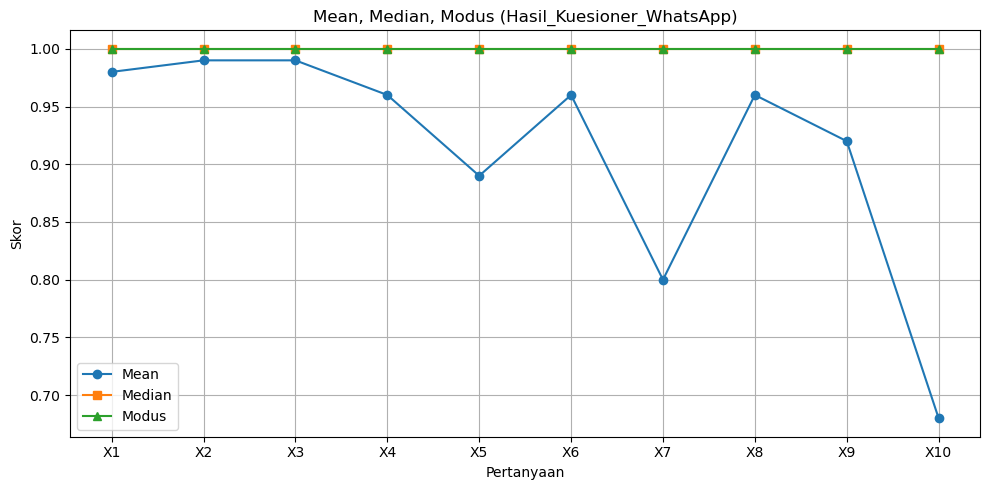

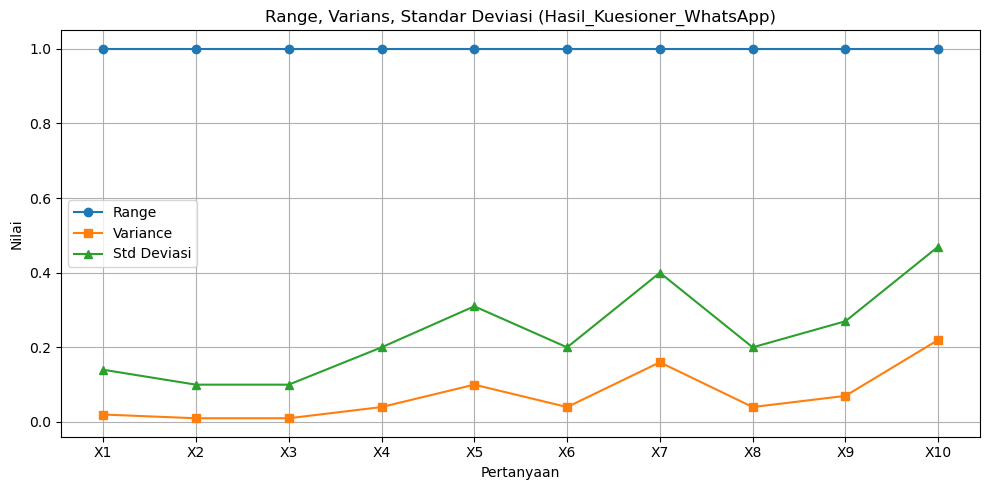

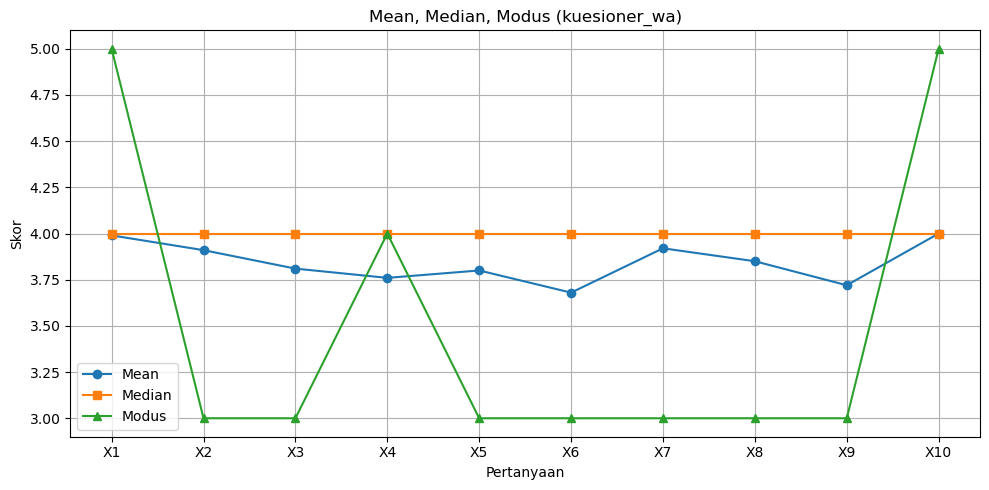

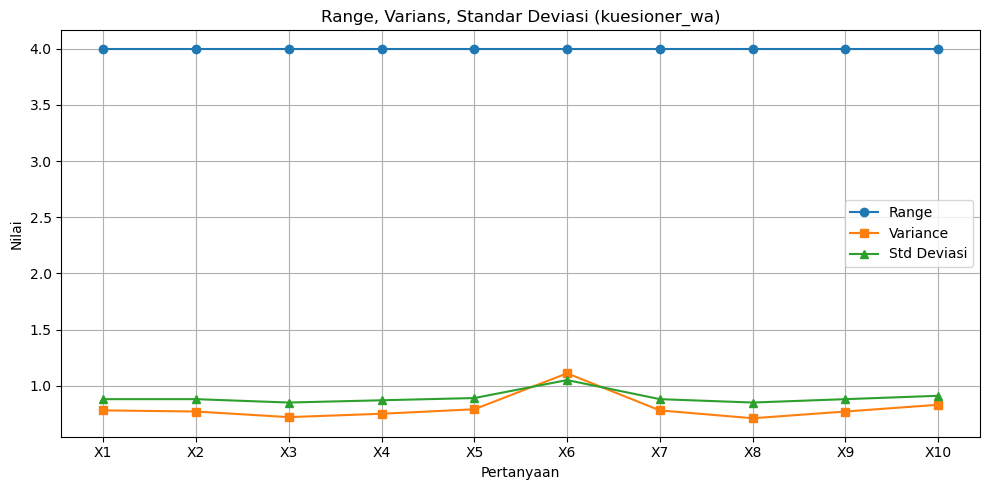

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, median, mode, variance, stdev, StatisticsError

# Baca kedua file
df1 = pd.read_excel("Hasil_Kuesioner_WhatsApp.xlsx")
df2 = pd.read_excel("kuesioner_wa.xlsx")

# Tentukan kolom pertanyaan
kolom1 = df1.columns[1:]
kolom2 = df2.columns[2:]

# Fungsi bantu cari modus aman
def safe_mode(data):
    try:
        return mode(data)
    except StatisticsError:
        return None

# Fungsi menghitung statistik dan menggambar grafiknya
def buat_grafik_statistik(df, kolom_list, nama_file):
    statistik = {
        "Mean": [],
        "Median": [],
        "Modus": [],
        "Range": [],
        "Variance": [],
        "Std Deviasi": []
    }

    label_kolom = []

    for kol in kolom_list:
        data = df[kol].dropna().tolist()
        label_kolom.append(kol)
        statistik["Mean"].append(round(mean(data), 2))
        statistik["Median"].append(median(data))
        statistik["Modus"].append(safe_mode(data))
        statistik["Range"].append(max(data) - min(data))
        statistik["Variance"].append(round(variance(data), 2))
        statistik["Std Deviasi"].append(round(stdev(data), 2))

    # Plot Mean, Median, Modus
    plt.figure(figsize=(10, 5))
    plt.plot(label_kolom, statistik["Mean"], marker='o', label='Mean')
    plt.plot(label_kolom, statistik["Median"], marker='s', label='Median')
    plt.plot(label_kolom, statistik["Modus"], marker='^', label='Modus')
    plt.title(f'Mean, Median, Modus ({nama_file})')
    plt.xlabel('Pertanyaan')
    plt.ylabel('Skor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Range, Varians, Std Deviasi
    plt.figure(figsize=(10, 5))
    plt.plot(label_kolom, statistik["Range"], marker='o', label='Range')
    plt.plot(label_kolom, statistik["Variance"], marker='s', label='Variance')
    plt.plot(label_kolom, statistik["Std Deviasi"], marker='^', label='Std Deviasi')
    plt.title(f'Range, Varians, Standar Deviasi ({nama_file})')
    plt.xlabel('Pertanyaan')
    plt.ylabel('Nilai')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Jalankan untuk kedua file
buat_grafik_statistik(df1, kolom1, "Hasil_Kuesioner_WhatsApp")
buat_grafik_statistik(df2, kolom2, "kuesioner_wa")

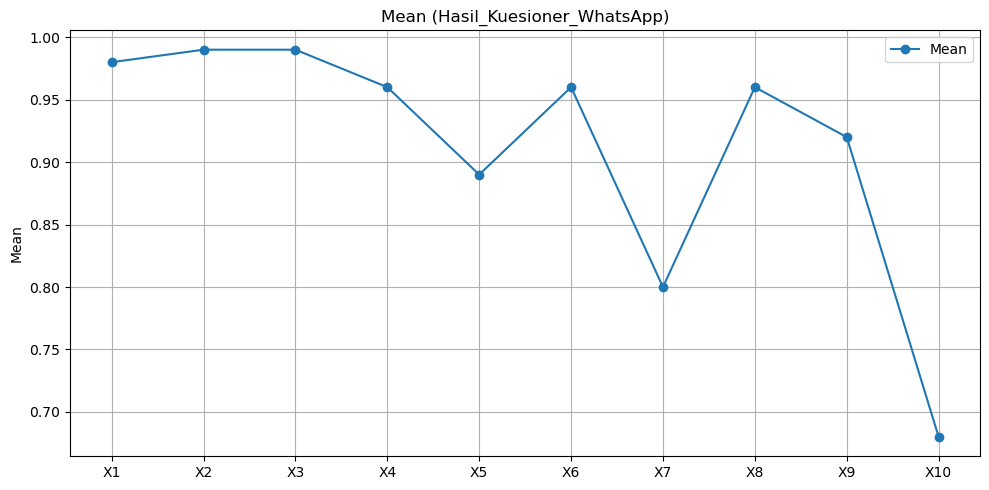

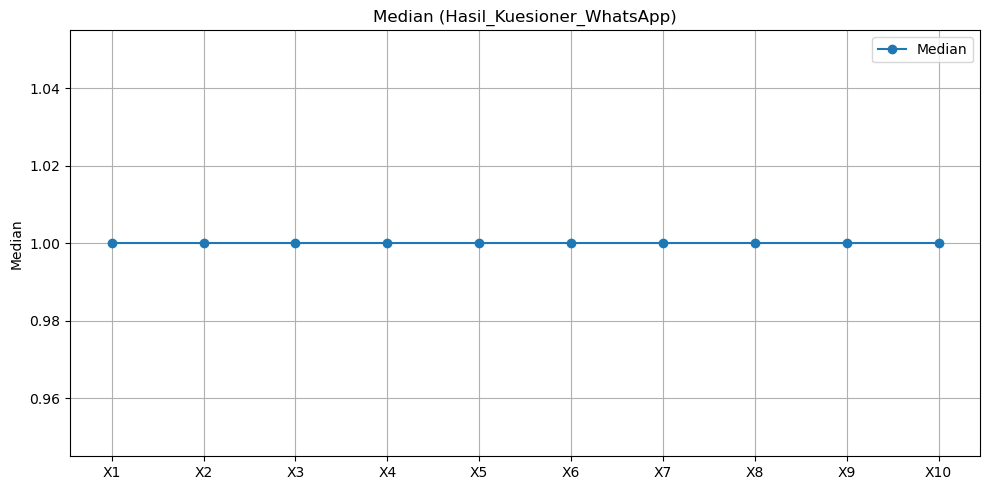

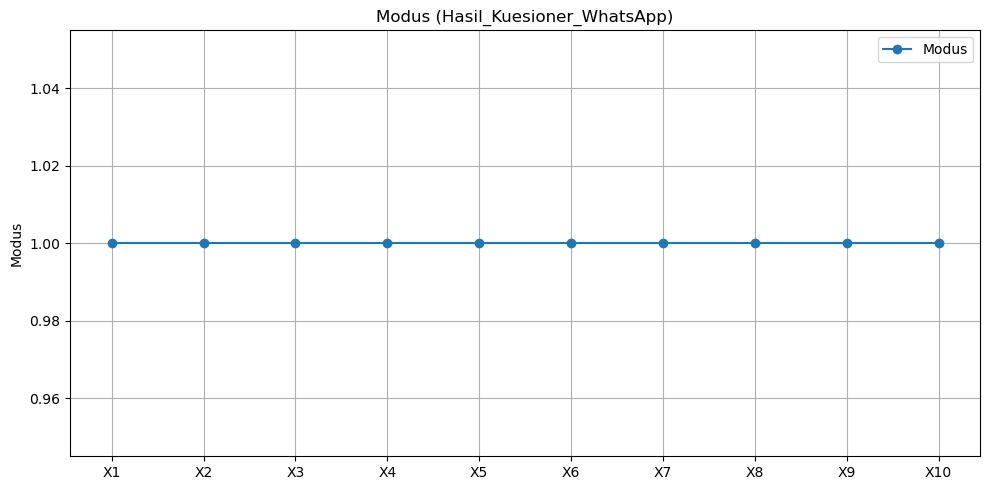

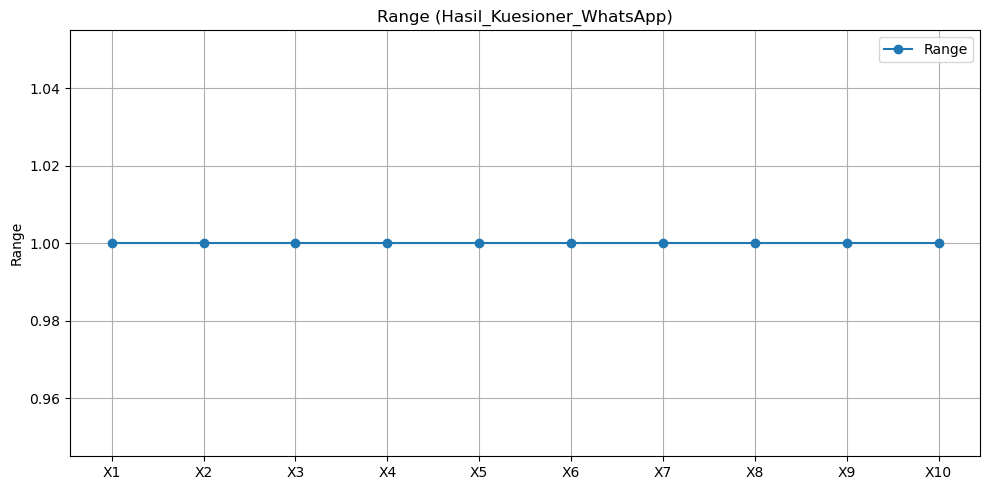

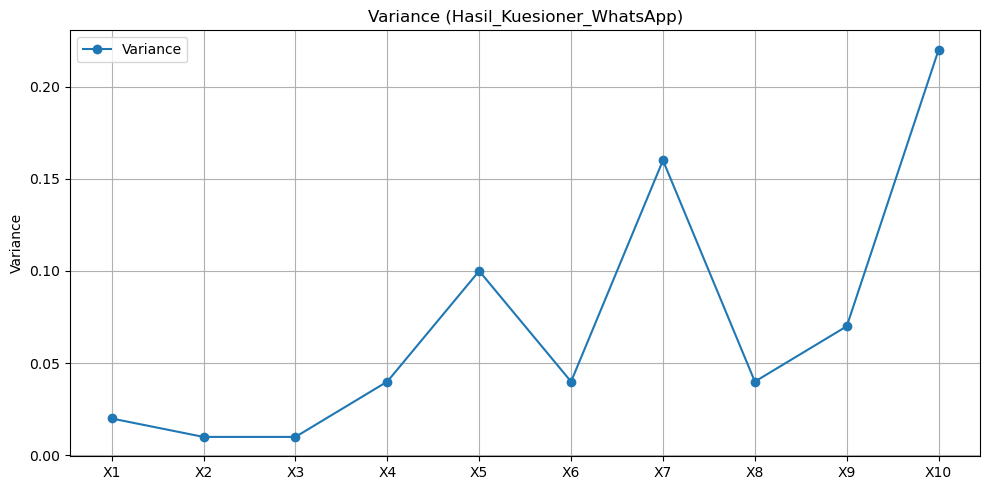

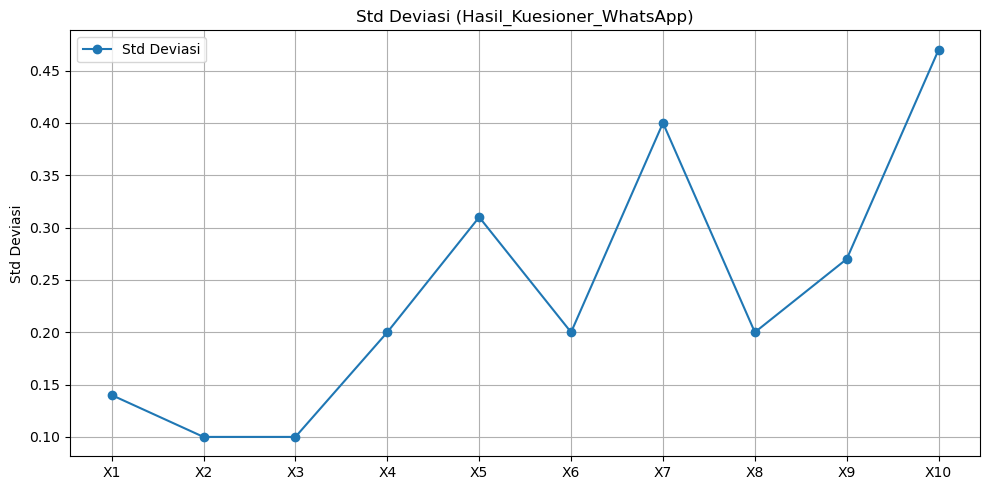


📊 UJI VALIDITAS (Hasil_Kuesioner_WhatsApp)
X1                  : r = 0.4244
X2                  : r = 0.4219
X3                  : r = 0.0107
X4                  : r = 0.5229
X5                  : r = 0.4297
X6                  : r = 0.1888
X7                  : r = 0.7284
X8                  : r = 0.3976
X9                  : r = 0.6347
X10                 : r = 0.6519


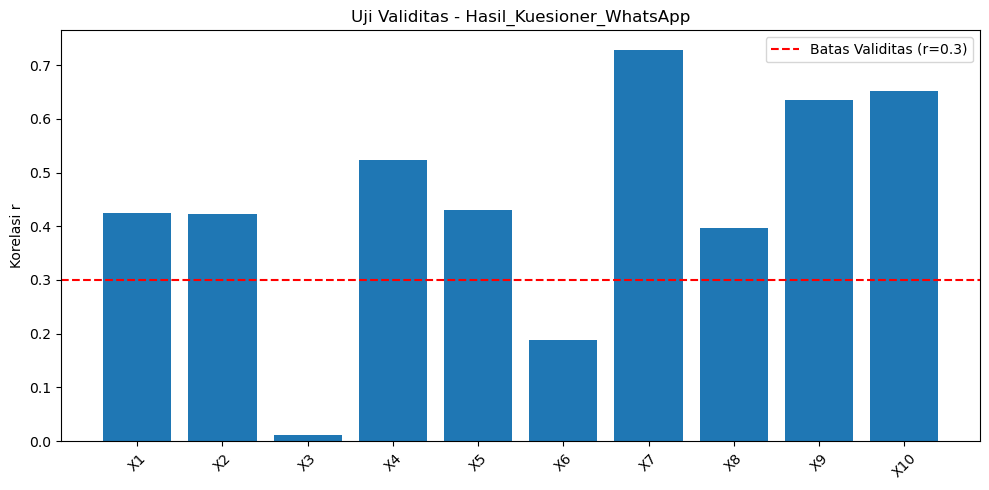


📐 UJI LINEARITAS (Hasil_Kuesioner_WhatsApp)
--------------------------------------------------
X1                  : p-value = 0.0000 → Linear


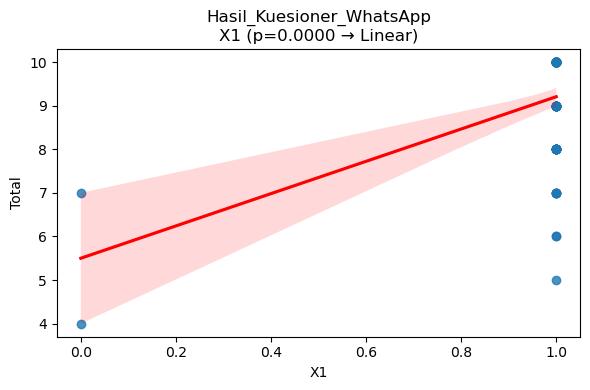

X2                  : p-value = 0.0000 → Linear


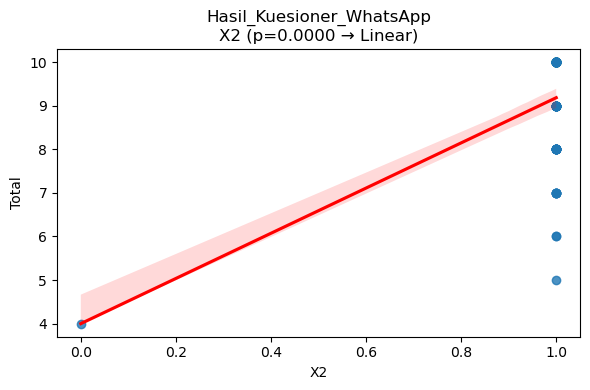

X3                  : p-value = 0.9159 → Tidak Linear


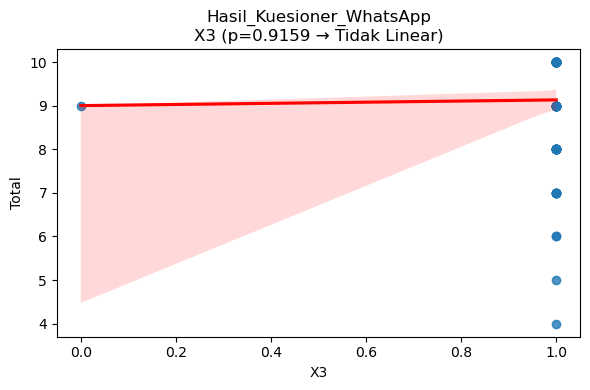

X4                  : p-value = 0.0000 → Linear


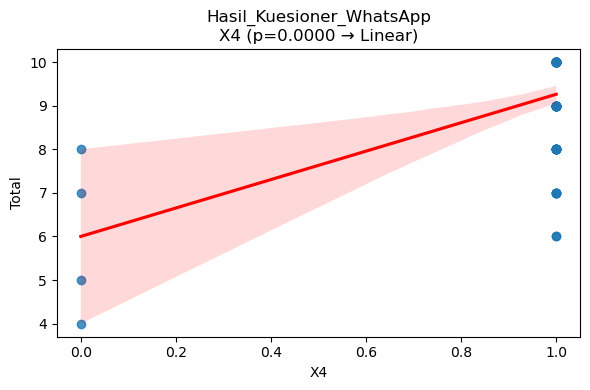

X5                  : p-value = 0.0000 → Linear


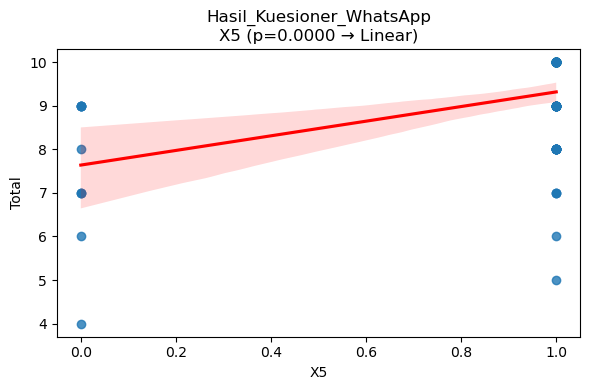

X6                  : p-value = 0.0600 → Tidak Linear


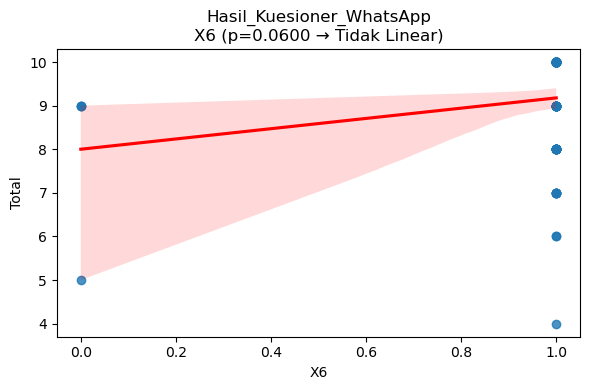

X7                  : p-value = 0.0000 → Linear


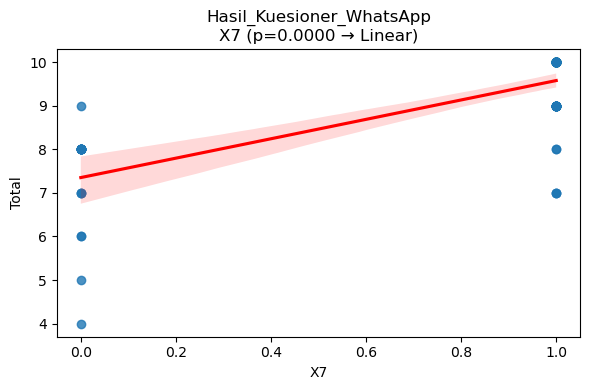

X8                  : p-value = 0.0000 → Linear


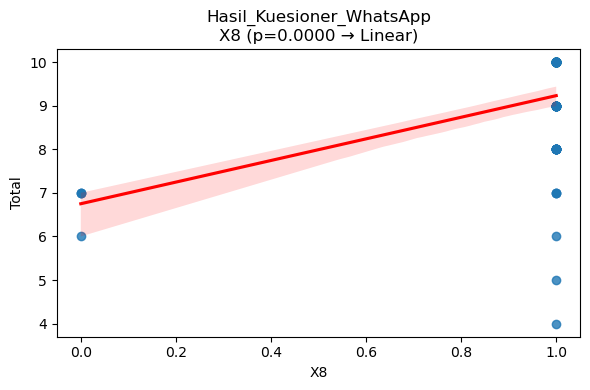

X9                  : p-value = 0.0000 → Linear


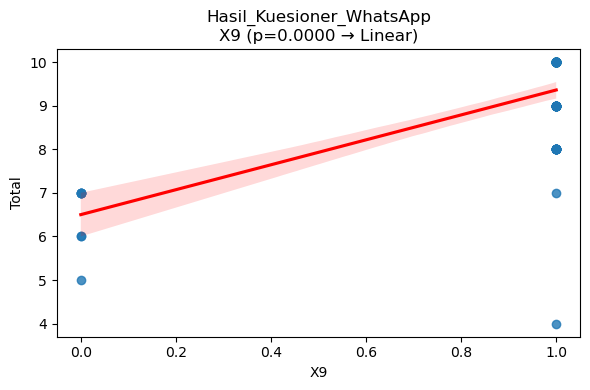

X10                 : p-value = 0.0000 → Linear


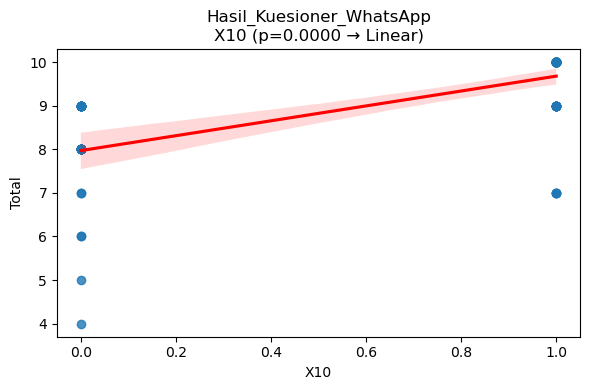

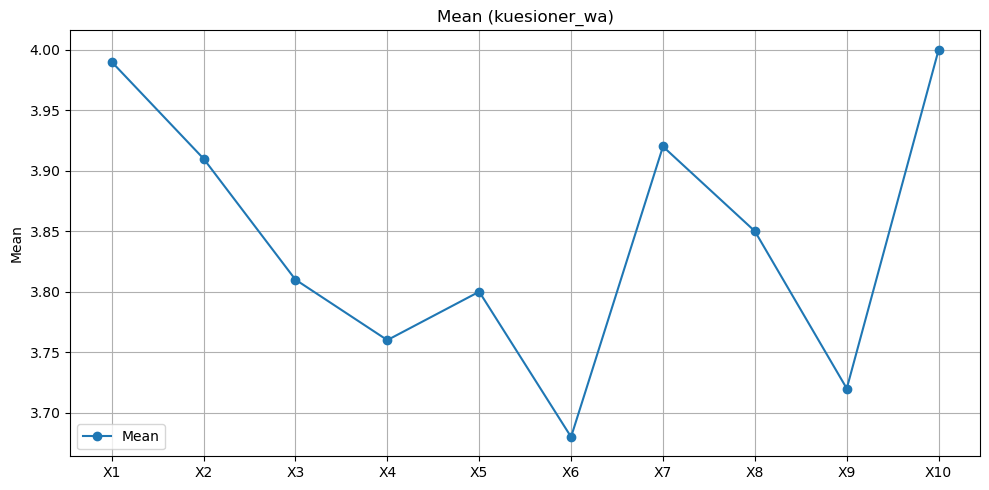

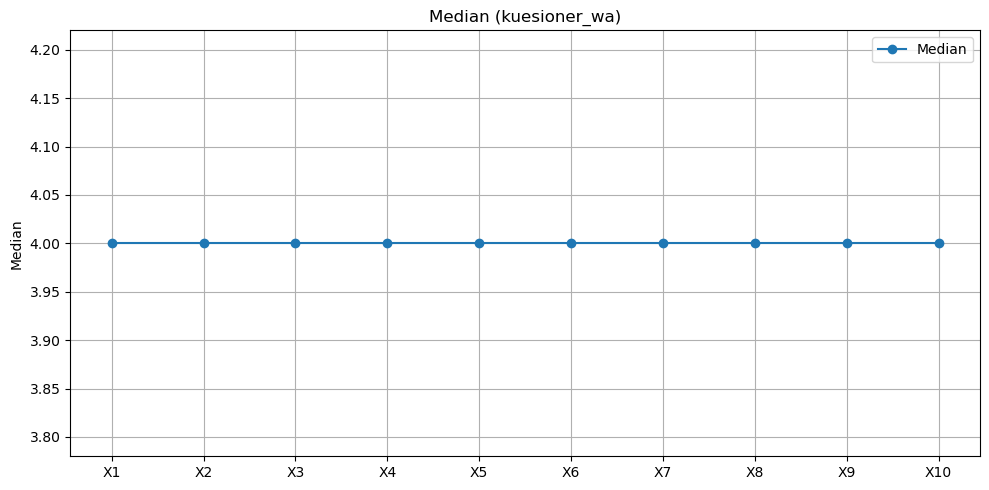

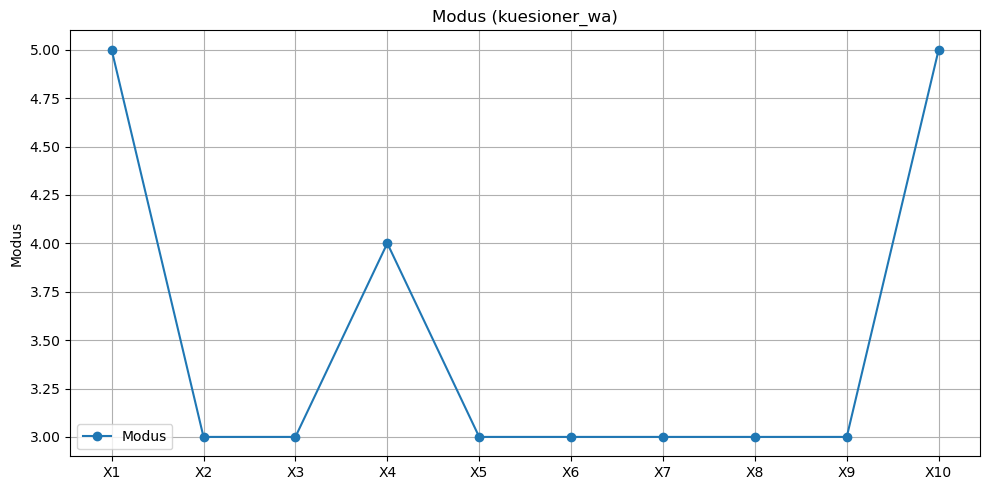

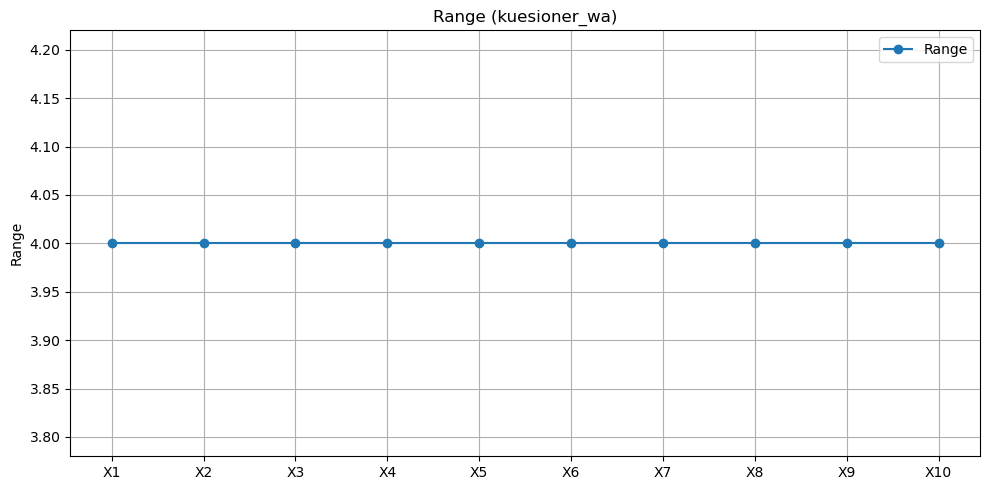

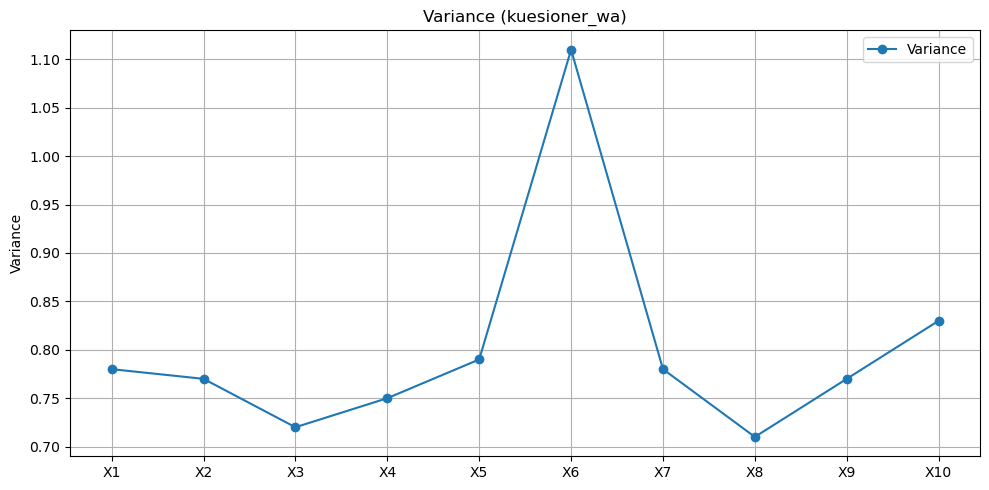

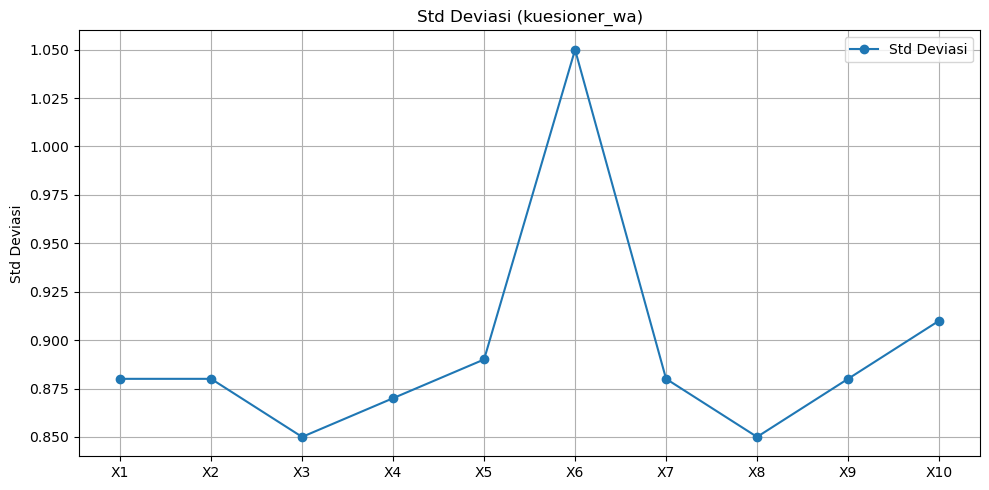


📊 UJI VALIDITAS (kuesioner_wa)
X1                  : r = 0.8251
X2                  : r = 0.8479
X3                  : r = 0.6908
X4                  : r = 0.8225
X5                  : r = 0.8759
X6                  : r = 0.7307
X7                  : r = 0.8424
X8                  : r = 0.8326
X9                  : r = 0.7442
X10                 : r = 0.8251


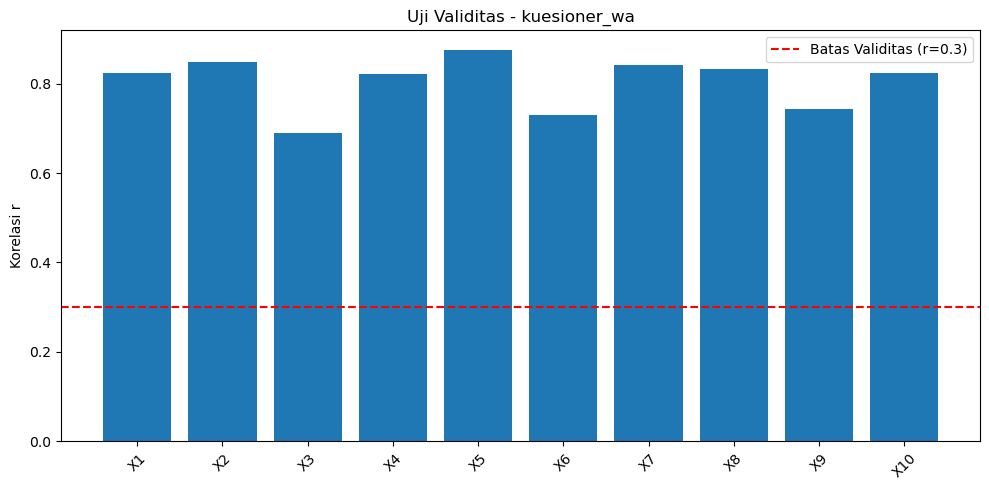


📐 UJI LINEARITAS (kuesioner_wa)
--------------------------------------------------
X1                  : p-value = 0.0000 → Linear


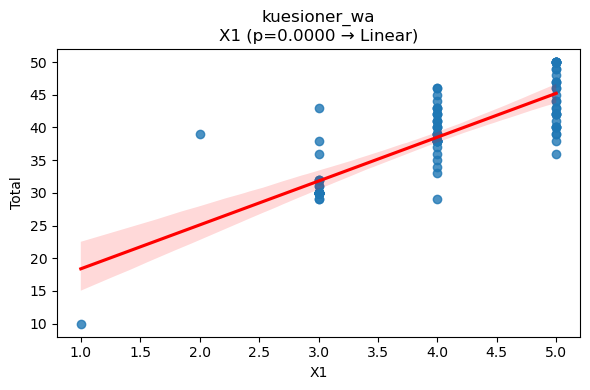

X2                  : p-value = 0.0000 → Linear


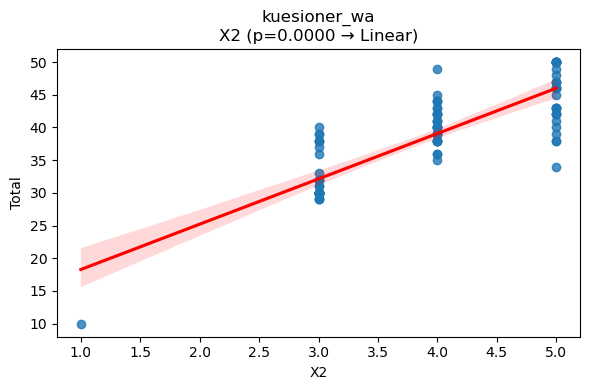

X3                  : p-value = 0.0000 → Linear


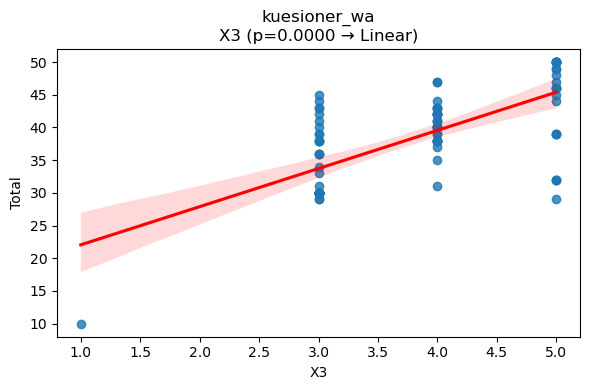

X4                  : p-value = 0.0000 → Linear


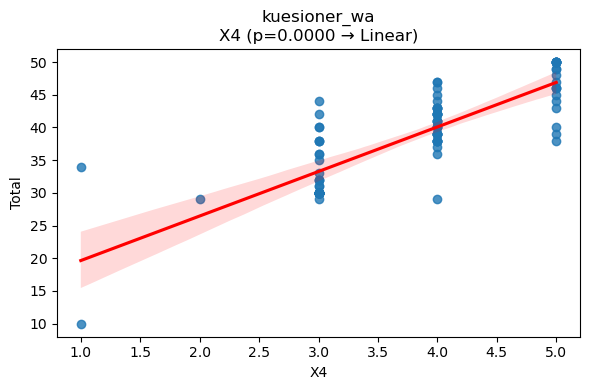

X5                  : p-value = 0.0000 → Linear


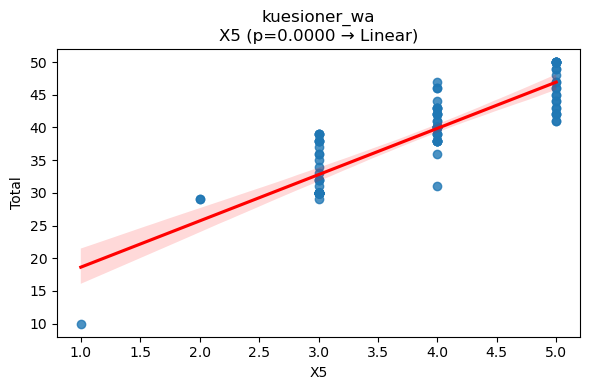

X6                  : p-value = 0.0000 → Linear


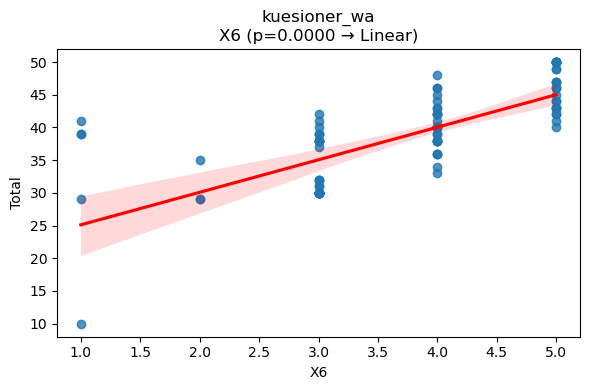

X7                  : p-value = 0.0000 → Linear


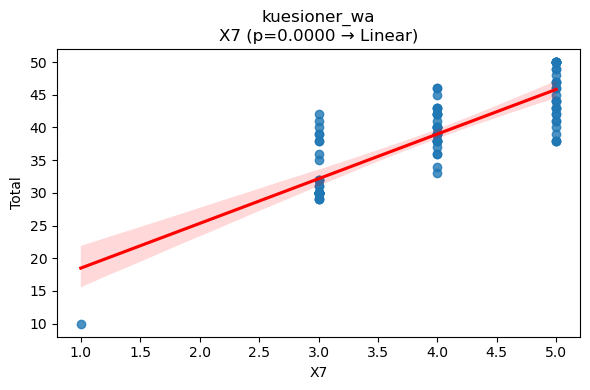

X8                  : p-value = 0.0000 → Linear


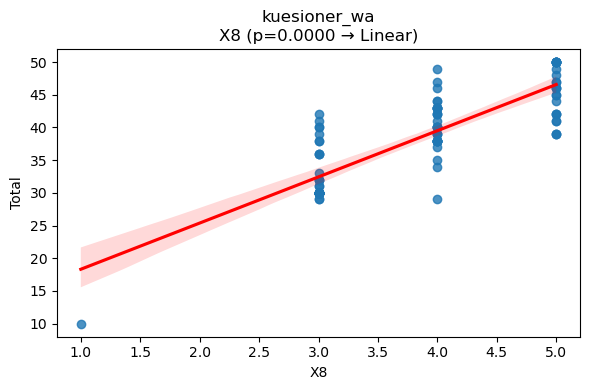

X9                  : p-value = 0.0000 → Linear


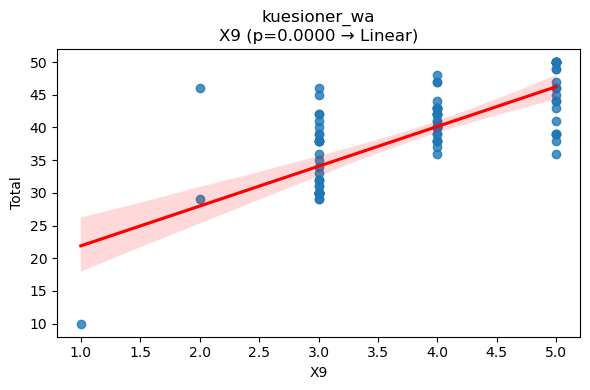

X10                 : p-value = 0.0000 → Linear


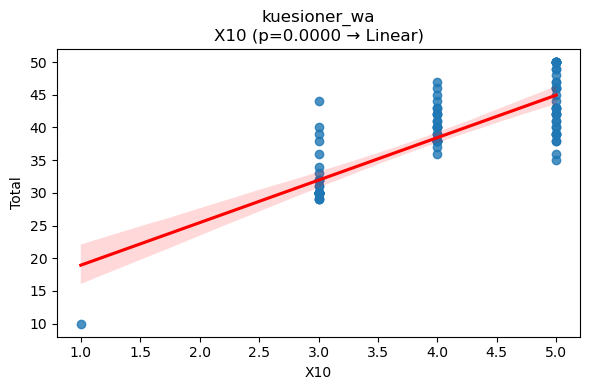

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, variance, stdev, StatisticsError
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Fungsi cari modus yang aman
def safe_mode(data):
    try:
        return mode(data)
    except StatisticsError:
        return None

# Fungsi statistik deskriptif
def buat_grafik_statistik(df, kolom_list, nama_file):
    statistik = {
        "Mean": [],
        "Median": [],
        "Modus": [],
        "Range": [],
        "Variance": [],
        "Std Deviasi": []
    }

    label_kolom = []

    for kol in kolom_list:
        data = df[kol].dropna().tolist()
        label_kolom.append(kol)
        statistik["Mean"].append(round(mean(data), 2))
        statistik["Median"].append(median(data))
        statistik["Modus"].append(safe_mode(data))
        statistik["Range"].append(max(data) - min(data))
        statistik["Variance"].append(round(variance(data), 2))
        statistik["Std Deviasi"].append(round(stdev(data), 2))

    for stat_name, stat_values in statistik.items():
        plt.figure(figsize=(10, 5))
        plt.plot(label_kolom, stat_values, marker='o', label=stat_name)
        plt.title(f'{stat_name} ({nama_file})')
        plt.xlabel('')
        plt.ylabel(stat_name)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Fungsi uji validitas
def uji_validitas(df, kolom_list, nama_file):
    print(f"\n📊 UJI VALIDITAS ({nama_file})")
    hasil_validitas = []

    for kol in kolom_list:
        try:
            korelasi, _ = pearsonr(df[kol], df["Total"])
            hasil_validitas.append(korelasi)
            print(f"{kol:<20}: r = {korelasi:.4f}")
        except Exception as e:
            hasil_validitas.append(0)
            print(f"{kol:<20}: ERROR → {e}")

    plt.figure(figsize=(10, 5))
    plt.bar(kolom_list, hasil_validitas)
    plt.axhline(0.3, color='red', linestyle='--', label='Batas Validitas (r=0.3)')
    plt.title(f'Uji Validitas - {nama_file}')
    plt.xlabel('')
    plt.ylabel('Korelasi r')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Fungsi uji linearitas
def uji_linearitas(df, kolom_list, nama_file):
    print(f"\n📐 UJI LINEARITAS ({nama_file})\n" + "-"*50)
    for kol in kolom_list:
        try:
            formula = f"Total ~ Q('{kol}')" if not kol.isidentifier() else f"Total ~ {kol}"
            model = ols(formula, data=df).fit()
            anova = sm.stats.anova_lm(model, typ=2)
            p_val = anova["PR(>F)"].iloc[0]
            status = "Linear" if p_val < 0.05 else "Tidak Linear"
            print(f"{kol:<20}: p-value = {p_val:.4f} → {status}")

            plt.figure(figsize=(6, 4))
            sns.regplot(x=df[kol], y=df['Total'], line_kws={"color": "red"})
            plt.title(f'{nama_file}\n{kol} (p={p_val:.4f} → {status})')
            plt.xlabel(kol)
            plt.ylabel('Total')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"{kol:<20}: ERROR → {e}")

# === Pemrosesan ===

# Baca dua file
df1 = pd.read_excel("Hasil_Kuesioner_WhatsApp.xlsx")
df2 = pd.read_excel("kuesioner_wa.xlsx")

# Ambil kolom item (tanpa kolom pertama yang biasanya identitas)
kolom1 = df1.columns[1:]
kolom2 = df2.columns[2:]

# Hitung total skor tiap responden
df1["Total"] = df1[kolom1].sum(axis=1)
df2["Total"] = df2[kolom2].sum(axis=1)

# Proses file 1
buat_grafik_statistik(df1, kolom1, "Hasil_Kuesioner_WhatsApp")
uji_validitas(df1, kolom1, "Hasil_Kuesioner_WhatsApp")
uji_linearitas(df1, kolom1, "Hasil_Kuesioner_WhatsApp")

# Proses file 2
buat_grafik_statistik(df2, kolom2, "kuesioner_wa")
uji_validitas(df2, kolom2, "kuesioner_wa")
uji_linearitas(df2, kolom2, "kuesioner_wa")
